# Extraire des séries temporelles par coordonées
### Vue d'ensemble

Les données CORDEX correnpondent à des matrices 3D (date, latitude et longitude).  
Avec le module meteoraster, it est aussi possible d'obtenir des données temporelles dans une localisation précise.

Ici, nous allons explorer une projéction CORDEX couvrant toute le Maroc.

### Charger les données avec MeteoRaster
Pour le faire, il est nécéssaire de fournir la position (rélative) du fichier.  
Dans cette exemple, il est dans le dossier `data`du projet.

In [2]:
#Importer les modules nécéssaires
import pandas as pd
from pathlib import Path
from meteoraster import MeteoRaster
from matplotlib import pyplot as plt

#Charger les données CORDEX
data_path = Path(r'data/tas_MOROCCO_CSIRO-QCCCE-CSIRO-Mk3-6-0_rcp85_r1i1p1_SMHI-RCA4_v1_mon_20060101-21001231.mr')
data = MeteoRaster.load(data_path)

    Loading data\tas_MOROCCO_CSIRO-QCCCE-CSIRO-Mk3-6-0_rcp85_r1i1p1_SMHI-RCA4_v1_mon_20060101-21001231.mr...
        Loaded.


### Choisir des emplacements
Ci-dessous, un `dict` (dictionnaire) est préparé avec des pairs (nom: coordonées).  
Les coordonées sont définies comme un pair (latitude, longitude).  

In [3]:
plot_coordinates = {'Settat': (33,  -7.62), 'Casablanca': ( 33.59,  -7.62)}

### Obtenir les séries et préparer les graphiques
Pour le faire, il est nécéssaire de fournir la position (rélative) du fichier.  
Dans cette exemple, il est dans le dossier `data`du projet.

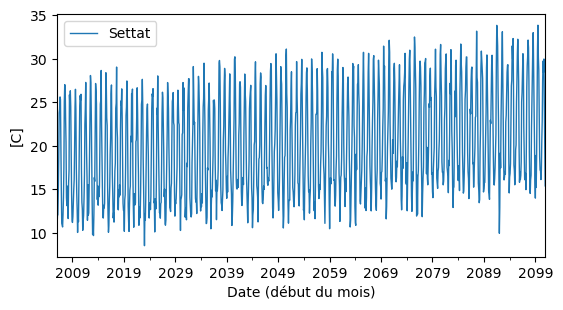

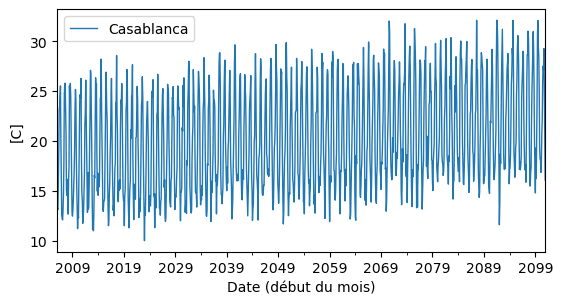

In [8]:
# Pour chaque emplacement...
for place, latlon in plot_coordinates.items():
    
    # lecture des données
    series = data.getDataFromLatLon(latlon[0], latlon[1]) 
    
    # Préparation du graphique
    series.columns = [place]
    fig, ax = plt.subplots(figsize=(16/2.54, 8/2.54))
    series.plot(ax=ax, linewidth=1)
    _ = ax.set_ylabel(f'[{data.units}]')
    _ = ax.set_xlabel(f'Date (début du mois)')

### Une autre manière de le faire
Ci-dessous, nous allons cibler la période 2030-2040 et rejoindre les séries dans le même graphique.

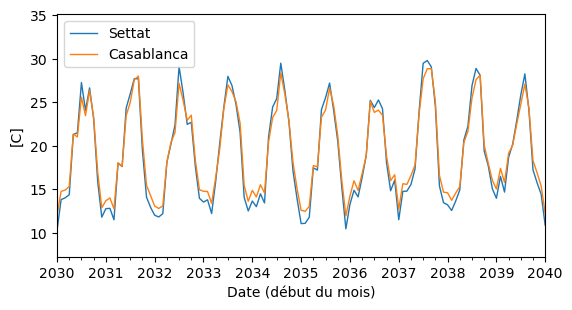

In [16]:
fig, ax = plt.subplots(figsize=(16/2.54, 8/2.54))

# Pour chaque emplacement...
for place, latlon in plot_coordinates.items():
    
    # lecture des données
    series = data.getDataFromLatLon(latlon[0], latlon[1]) 
    
    # Préparation du graphique
    series.columns = [place]
    
    series.plot(ax=ax, linewidth=1)
    _ = ax.set_ylabel(f'[{data.units}]')
    _ = ax.set_xlabel(f'Date (début du mois)')
    ax.set_xlim('2030-01-01', '2040-01-01')

### Explorer des chagements
Essayez d'adapter le code.